# Deep Q-Network with double Q-Learning (DQN)
---

### 1. Import the Necessary Packages

In [2]:
import gym
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

In [3]:
env = gym.make('LunarLander-v2', render_mode='rgb_array')
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


In [4]:
from dqn_agent import Agent
# import display
from IPython import display

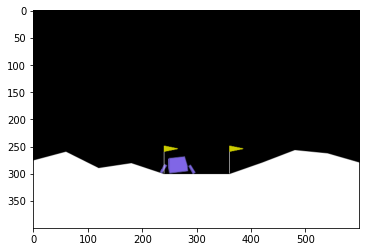

In [5]:
agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state = env.reset()[0]
for j in range(200):
    action = agent.act(state)
    rgb_array = env.render()
    # plot the image
    display.clear_output(wait=True)
    plt.imshow(rgb_array)
    plt.show()
    state, reward, done, _, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with Double DQN

Episode 100	Average Score: -147.06
Episode 200	Average Score: -111.73
Episode 300	Average Score: -47.256
Episode 400	Average Score: 87.600
Episode 500	Average Score: 148.81
Episode 600	Average Score: 183.21
Episode 677	Average Score: 202.31
Environment solved in 577 episodes!	Average Score: 202.31


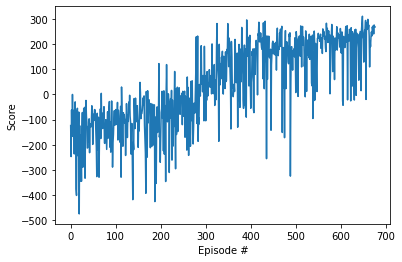

In [6]:
def model(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = model()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

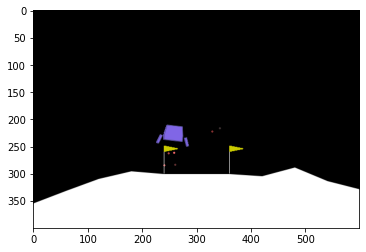

In [7]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(5):
    state = env.reset()[0]
    for j in range(200):
        action = agent.act(state)
        rgb_array = env.render()
        # plot the image
        display.clear_output(wait=True)
        plt.imshow(rgb_array)
        plt.show()
        state, reward, done, _, _ = env.step(action)
        if done:
            break 
            
env.close()